<a href="https://colab.research.google.com/github/diogorodrigues2002/Data-Mining-Project/blob/duarte_branch/UberEatsdaWish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from math import ceil

In [170]:
#Reads the document
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

#Preview of the dataset

In [171]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [172]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,31161.0,27.506499,7.160898,15.0,23.0,26.0,31.00,80.00
vendor_count,31888.0,3.102609,2.771587,0.0,1.0,2.0,4.00,41.00
product_count,31888.0,5.668245,6.957287,0.0,2.0,3.0,7.00,269.00
is_chain,31888.0,2.818866,3.977529,0.0,1.0,2.0,3.00,83.00
first_order,31782.0,28.478604,24.109086,0.0,7.0,22.0,45.00,90.00
last_order,31888.0,63.675521,23.226123,0.0,49.0,70.0,83.00,90.00
CUI_American,31888.0,4.880438,11.654018,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31888.0,9.960451,23.564351,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31888.0,2.300633,8.479734,0.0,0.0,0.0,0.00,229.22
CUI_Cafe,31888.0,0.801163,6.427132,0.0,0.0,0.0,0.00,326.10


In [173]:
df.info()
#Object -> customer_id ; customer_region ; last_promo ; payment_method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [174]:
df.isna().sum()
#customer_age why? probably we can calculate
#first_order
#HR_0 -> why?

,0
customer_id,0
customer_region,0
customer_age,727
vendor_count,0
product_count,0
is_chain,0
first_order,106
last_order,0
last_promo,0
payment_method,0


In [175]:
df.duplicated().sum()            #13 duplicates
df.drop_duplicates(inplace=True)

In [176]:
non_metric_features = ['customer_id', 'customer_region', 'last_promo', 'payment_method']
metric_features = df.columns.drop(non_metric_features).tolist()
metric_features

['customer_age',
 'vendor_count',
 'product_count',
 'is_chain',
 'first_order',
 'last_order',
 'CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai',
 'DOW_0',
 'DOW_1',
 'DOW_2',
 'DOW_3',
 'DOW_4',
 'DOW_5',
 'DOW_6',
 'HR_0',
 'HR_1',
 'HR_2',
 'HR_3',
 'HR_4',
 'HR_5',
 'HR_6',
 'HR_7',
 'HR_8',
 'HR_9',
 'HR_10',
 'HR_11',
 'HR_12',
 'HR_13',
 'HR_14',
 'HR_15',
 'HR_16',
 'HR_17',
 'HR_18',
 'HR_19',
 'HR_20',
 'HR_21',
 'HR_22',
 'HR_23']

# Análise de cada **variável**

# customer_age

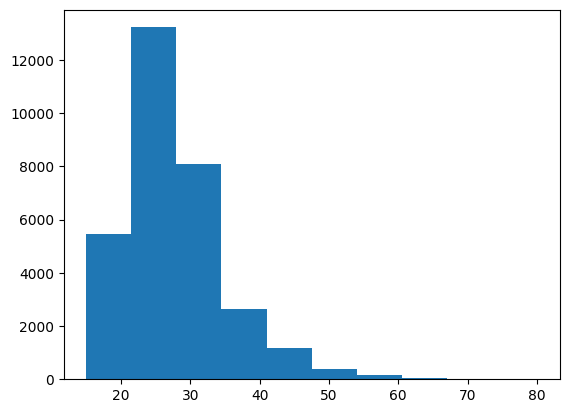

In [177]:
plt.hist(df['customer_age'], bins = 10)
plt.show()
#join the ages above 40 years

#Product_count

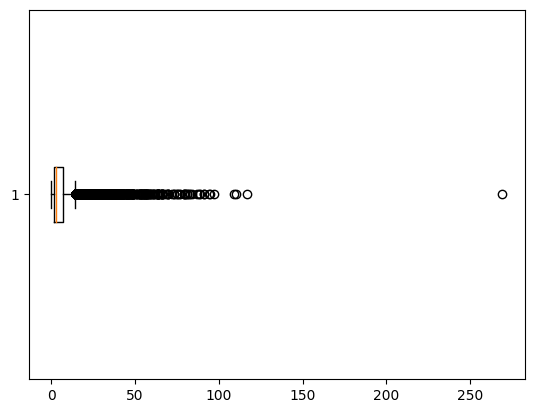

In [178]:
plt.boxplot(df['product_count'], vert = False)
plt.show()

We see that there is a really strange outlier, we will move it into a number closer to 100 since it is closer

#Vendor_count

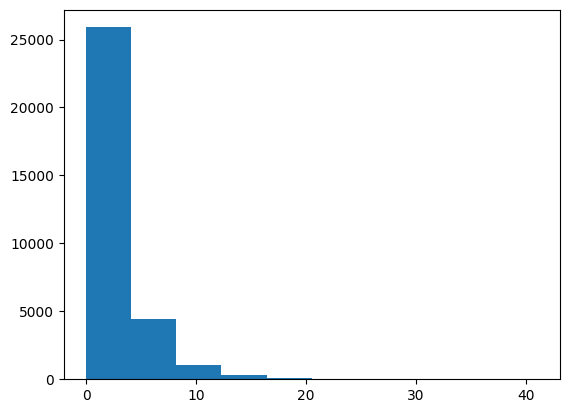

In [179]:
plt.hist(df['vendor_count'], bins = 10)
plt.show()
#Doesn't make sense

# First order and last_order

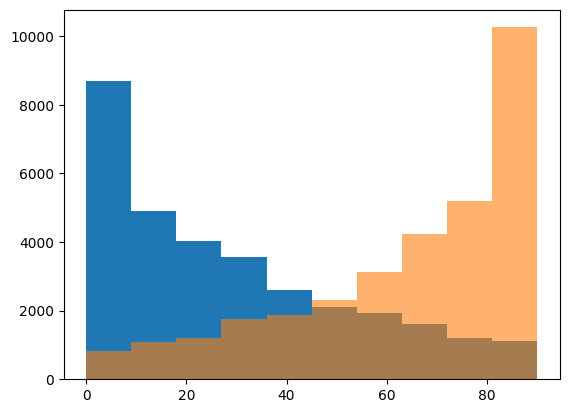

In [180]:
plt.hist(df['first_order'], bins = 10)
plt.hist(df['last_order'], bins = 10, alpha = 0.6)
plt.show()
#They seem symetric

#Last_promo


In [181]:
df['last_promo'].replace('-', 'NO PROMO', inplace = True)

<ipython-input-181-b338c491eeb3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last_promo'].replace('-', 'NO PROMO', inplace = True)


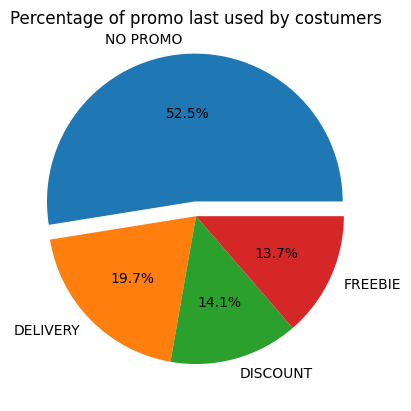

In [182]:
myexplode = [0.1, 0, 0, 0]
plt.pie(df['last_promo'].value_counts(), labels = df['last_promo'].value_counts().index, autopct='%1.1f%%', explode = myexplode)

plt.title('Percentage of promo last used by costumers')
plt.show()
#The costumers don't appear to use a lot of promotions

# Payment Method

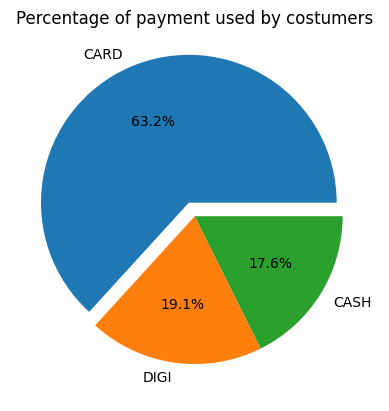

In [183]:
myexplode = [0.1, 0, 0]
plt.pie(df['payment_method'].value_counts(), labels = df['payment_method'].value_counts().index, autopct='%1.1f%%', explode = myexplode)

plt.title('Percentage of payment used by costumers')
plt.show()
#The most common payment method is by card

# CUI_ (type)

In [184]:
df_cui = df[df.columns[df.columns.str.contains('CUI_')]]
CUI_count = df_cui.sum().sort_values(ascending = False)

In [185]:
CUI_percentages = CUI_count / CUI_count.sum() * 100

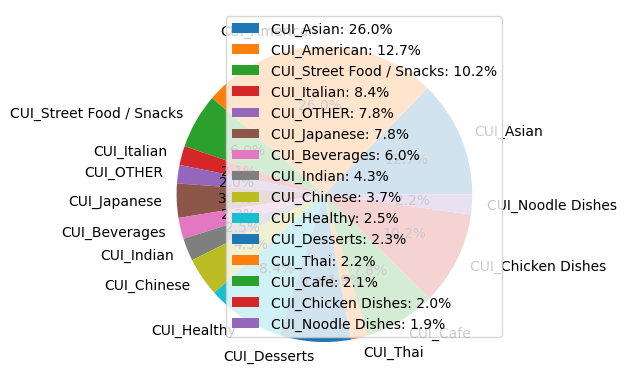

In [186]:
plt.pie(df_cui.sum(),
        labels = CUI_count.index,
        autopct='%1.1f%%')
plt.legend(labels = [f'{cuisine}: {percentage:.1f}%'
           for cuisine, percentage in zip(CUI_count.index, CUI_percentages)],
           loc='best')

plt.show()

#DOW

In [187]:
df_week = df[df.columns[df.columns.str.contains('DOW_')]]
DOW_count = df_week.sum().sort_values(ascending = False)

In [188]:
DOW_percentages = DOW_count / DOW_count.sum() * 100

In [189]:
#Replaces the names to easiers understanding
df_week.columns = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
DOW_count.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

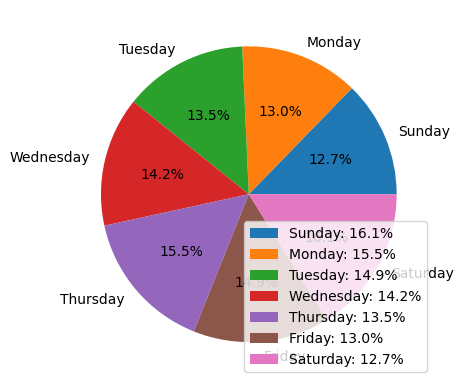

In [190]:
plt.pie(df_week.sum(),
        labels = DOW_count.index,
        autopct='%1.1f%%')
plt.legend(labels = [f'{day}: {percentage:.1f}%'
           for day, percentage in zip(DOW_count.index, DOW_percentages)],
           loc='best')
plt.show()
#Customers usually order more on a Sunday, however it is pretty evenly distributed

#Why does the legend appear with different percentages

#HR_

In [191]:
df_hr = df[df.columns[df.columns.str.contains('HR_')]]
HR_count = df_hr.sum().sort_values(ascending = False)

In [192]:
HR_percentages = HR_count / HR_count.sum() * 100

In [193]:
#Replaces the number of hours to easier understading
df_hr.columns = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

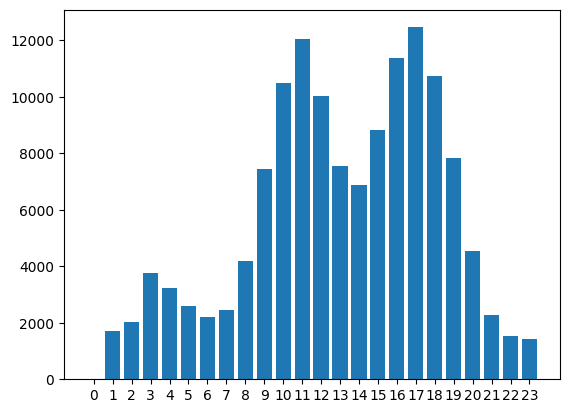

In [194]:
plt.bar(df_hr.sum().index, df_hr.sum())
plt.show()

We realize that the costumers normally order 1-2 hours before lunch and dinner time, (11- 12) and (16-18)

#Comparing **variables**

# Customer Age and Payment Method

In [195]:
#Dividing ages by classes of 10 years
df['customer_age_class'] = pd.cut(df['customer_age'], bins = range(0, 90, 10))
df['customer_age_class']

,customer_age_class
0,"(10.0, 20.0]"
1,"(10.0, 20.0]"
2,"(30.0, 40.0]"
3,NaN
4,"(10.0, 20.0]"
...,...
31883,"(20.0, 30.0]"
31884,NaN
31885,"(20.0, 30.0]"
31886,"(30.0, 40.0]"


<Axes: xlabel='payment_method'>

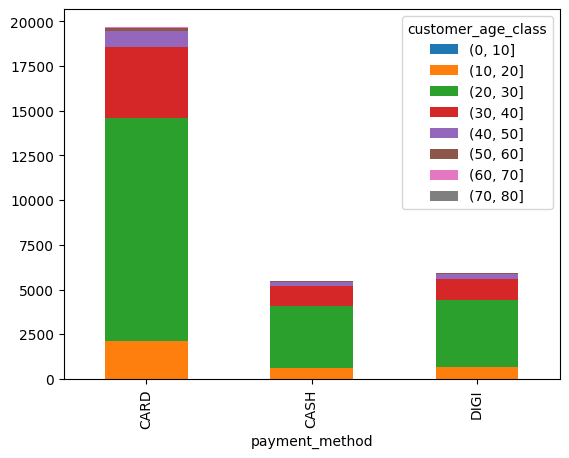

In [196]:
df['customer_age_class'].groupby(df['payment_method']).value_counts().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='payment_method'>

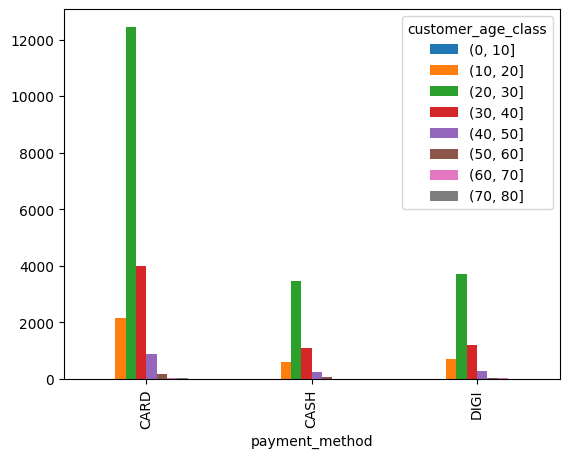

In [197]:
df['customer_age_class'].groupby(df['payment_method']).value_counts().unstack().plot(kind='bar', stacked=False)
#Every class prefers to use card as payment

#Relation between customer_age_class and CUI_types

<ipython-input-209-2463b4fa9be6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['customer_age_class'] = pd.cut(data['customer_age'], bins=age_bins, labels=age_labels, right=True)
<ipython-input-209-2463b4fa9be6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cui_columns] = data[cui_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
<ipython-input-209-2463b4fa9be6>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pa

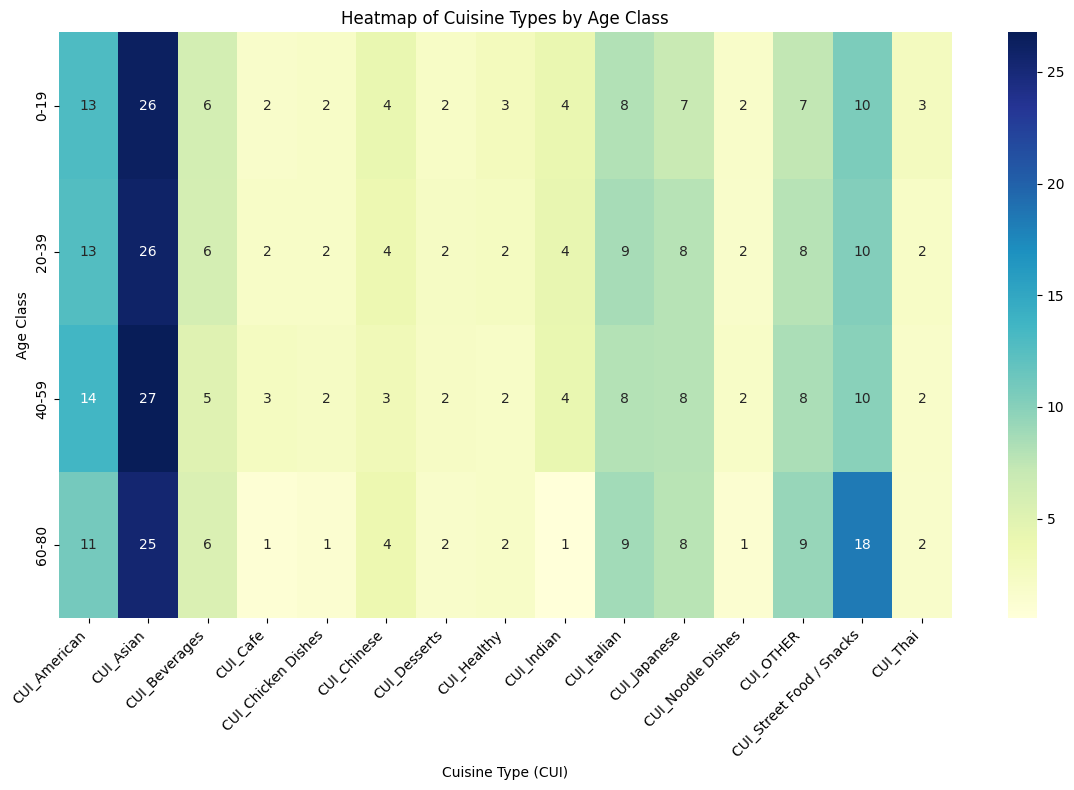

In [209]:
data = df.dropna(subset=['customer_age'])

# Define age classes (20-year bands)
age_bins = [0, 19, 39, 59, 80]
age_labels = ['0-19', '20-39', '40-59', '60-80']
data['customer_age_class'] = pd.cut(data['customer_age'], bins=age_bins, labels=age_labels, right=True)

# Filter columns that start with 'CUI_' for cuisine types
cui_columns = [col for col in data.columns if col.startswith('CUI_')]
data[cui_columns] = data[cui_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Group data by age class and sum cuisine types
age_cuisine_data = data.groupby('customer_age_class')[cui_columns].sum()

age_cuisine_data['Total Spent'] = age_cuisine_data.sum(axis=1)
age_cuisine_percentages = age_cuisine_data.div(age_cuisine_data['Total Spent'], axis=0) * 100
age_cuisine_percentages.drop(columns=['Total Spent'], inplace=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(age_cuisine_percentages, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Heatmap of Cuisine Types by Age Class')
plt.xlabel('Cuisine Type (CUI)')
plt.ylabel('Age Class')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

We can see that across all age classes the one which generates more money is the Asia Cuisine, however the older age classes (60 to 99 years) spent a good part on Street Food / Snacks

#Relation between customer_age and HR_

<ipython-input-210-8cae94168bee>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_hr_data = data.groupby('customer_age_class')[hr_columns].sum()


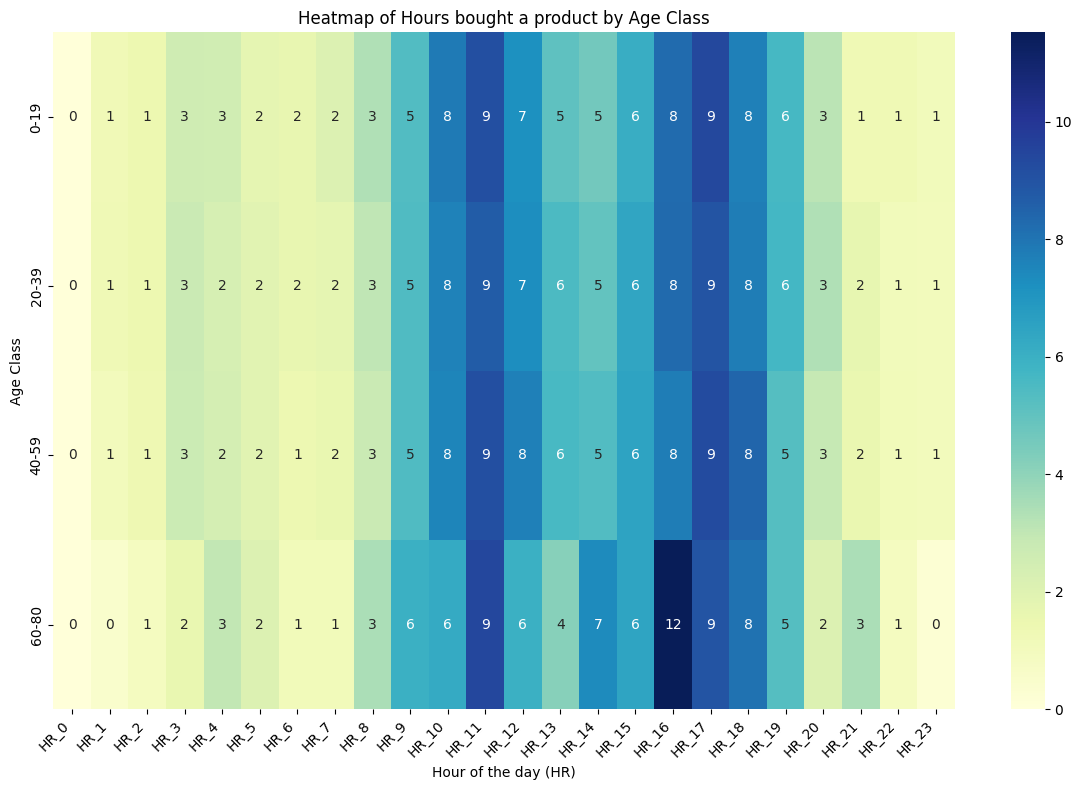

In [210]:
#Filter the columns that start with 'HR_'
hr_columns = [col for col in df.columns if col.startswith('HR_')]
df[hr_columns] = df[hr_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Group data by age class and sum cuisine types
age_hr_data = data.groupby('customer_age_class')[hr_columns].sum()
age_hr_data['Total Spent'] = age_hr_data.sum(axis=1)

age_hr_percentage = age_hr_data.div(age_hr_data['Total Spent'], axis=0) * 100
age_hr_percentage.drop(columns=['Total Spent'], inplace=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(age_hr_percentage, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Heatmap of Hours bought a product by Age Class')
plt.xlabel('Hour of the day (HR)')
plt.ylabel('Age Class')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

We realize that HR_0 doesn't have a single value in it, this implies that or the variable was wrongly inputed into the dataset or noone buys at this time, so we can exclude this column.  

#Relation between customer_age and vendor_count

<Axes: xlabel='vendor_count'>

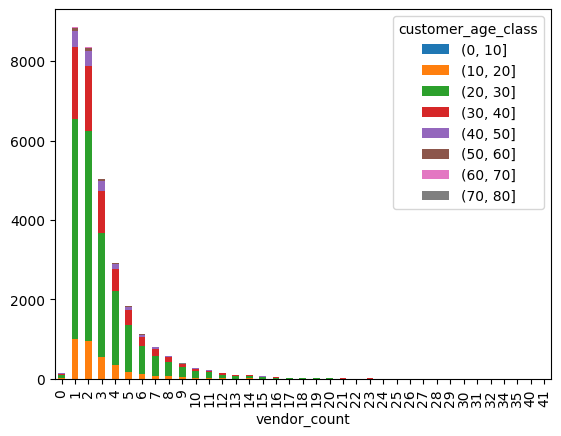

In [200]:
df['customer_age_class'].groupby(df['vendor_count']).value_counts().unstack().plot(kind='bar', stacked=True)

#Relation between product_count an customer_age

<Axes: xlabel='product_count'>

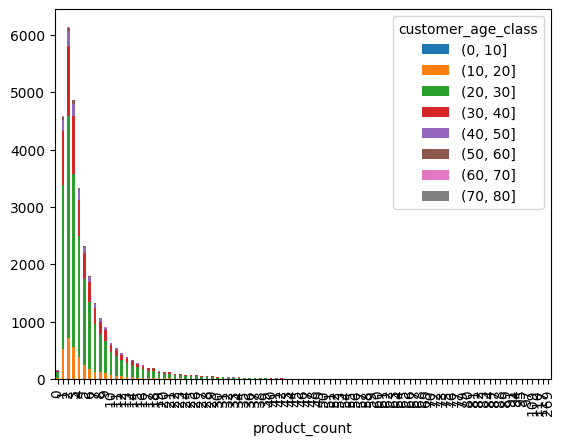

In [208]:
#Sums the total of product_count per age
df['customer_age_class'].groupby(df['product_count']).value_counts().unstack().plot(kind='bar', stacked=True)


#Errors in the data

# 1. Customers that have zero produc_count, but have values in other variables

In [202]:
df[(df['product_count'] == 0) & (df['vendor_count'] != 0)]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,customer_age_class
6180,aed85972bb,4660,27.0,1,0,0,6.0,6,DISCOUNT,CARD,...,0,0,0,1,0,0,0,0,0,"(20, 30]"
6183,b2ebe2e6e0,4660,43.0,1,0,0,6.0,6,NO PROMO,CARD,...,0,0,0,0,0,0,0,0,0,"(40, 50]"
10995,6f723d9894,4660,36.0,1,0,0,13.0,13,DELIVERY,CASH,...,0,0,0,0,0,0,0,0,0,"(30, 40]"
14137,9d74f2ac81,4660,27.0,1,0,0,19.0,19,DELIVERY,CARD,...,0,0,1,0,0,0,0,0,0,"(20, 30]"
14611,27b7eed8fa,4660,35.0,1,0,0,20.0,20,DISCOUNT,DIGI,...,1,0,0,0,0,0,0,0,0,"(30, 40]"
14639,6c9e68b2e7,4660,22.0,1,0,0,20.0,20,DISCOUNT,DIGI,...,0,1,0,0,0,0,0,0,0,"(20, 30]"
16099,c0b330c4df,4660,27.0,1,0,0,23.0,23,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,"(20, 30]"
17200,68c4faeecb,4660,25.0,1,0,0,26.0,26,FREEBIE,DIGI,...,0,0,0,0,0,0,1,0,0,"(20, 30]"
19972,48e8abd5bf,4660,34.0,1,0,0,33.0,33,DELIVERY,CASH,...,0,0,0,0,0,0,0,0,0,"(30, 40]"
23095,7bfc19bd89,4660,21.0,1,0,0,42.0,42,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,"(20, 30]"


Eg Solution: Going to substitute the value bases on the number of vendor_count and first_order/last_order

#2. The number of orders by HR_ is different than the sum of orders by DOW_

In [203]:
#df[df.loc[:,'DOW_0': 'DOW_6'].sum() != df.loc[:,'HR_0': 'HR_23'].sum()]
#df[df.loc[:,'DOW_0': 'DOW_6'].sum(axis=1) != df.loc[:,'HR_0': 'HR_23'].sum(axis=1)]
df['Tot HR_'] = df.loc[:,'HR_0': 'HR_23'].sum(axis=1)
df['Tot DOW__'] = df.loc[:,'DOW_0': 'DOW_6'].sum(axis=1)

df[df['Tot HR_'] != df['Tot DOW__']]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,customer_age_class,Tot HR_,Tot DOW__
34,ae38da6386,8670,21.0,2,3,1,0.0,7,DELIVERY,DIGI,...,0,0,0,0,0,0,0,"(20, 30]",1.0,2
87,a21a839c77,4140,19.0,1,4,4,0.0,21,NO PROMO,CARD,...,0,0,1,0,0,1,0,"(10, 20]",3.0,4
121,9237d23413,8670,22.0,3,4,2,0.0,27,NO PROMO,CARD,...,0,0,0,0,0,0,0,"(20, 30]",3.0,4
132,8c6ffd7357,4660,25.0,3,4,1,0.0,28,NO PROMO,CARD,...,0,0,0,0,0,0,0,"(20, 30]",2.0,3
186,67c6c9f9c4,4660,24.0,1,3,0,0.0,36,FREEBIE,DIGI,...,0,0,0,0,1,0,0,"(20, 30]",2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31298,37b72b449d,2360,23.0,1,4,0,85.0,85,DELIVERY,DIGI,...,0,0,0,0,0,0,0,"(20, 30]",0.0,1
31549,ac382ddfd1,-,28.0,1,2,2,87.0,89,DELIVERY,CARD,...,0,0,0,0,0,0,1,"(20, 30]",1.0,2
31615,96f1fc25e3,8670,25.0,2,2,1,88.0,88,DELIVERY,CASH,...,0,0,0,0,0,0,0,"(20, 30]",1.0,2
31781,d7c7face7e,2440,26.0,1,1,1,90.0,90,DELIVERY,CASH,...,0,0,0,0,0,0,0,"(20, 30]",0.0,1


#3. The number of the first_order is bigger than the number on the last_order

In [204]:
df[df['first_order'] > df['last_order']]
#None, no problem here

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,customer_age_class,Tot HR_,Tot DOW__


# 4. The number of is_chain is bigger than product_count

In [205]:
df[df['is_chain'] > df['product_count']]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,customer_age_class,Tot HR_,Tot DOW__
1449,4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,...,0,0,0,0,0,0,0,"(20, 30]",0.0,0
1488,f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,...,0,0,0,0,0,0,0,"(20, 30]",0.0,0
7123,376f896388,8670,29.0,0,0,1,7.0,7,DELIVERY,CARD,...,0,0,0,0,0,0,0,"(20, 30]",0.0,0
7152,8a7b681c19,8670,17.0,0,0,1,7.0,7,NO PROMO,CASH,...,0,0,0,0,0,0,0,"(10, 20]",0.0,0
7166,a2b54d0827,8670,24.0,0,0,1,7.0,7,DELIVERY,CASH,...,0,0,0,0,0,0,0,"(20, 30]",0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31131,00b63adfed,8670,27.0,0,0,1,84.0,84,DELIVERY,CASH,...,0,0,0,0,0,0,0,"(20, 30]",0.0,0
31334,c3d607c31f,8670,35.0,0,0,1,85.0,85,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,"(30, 40]",0.0,0
31377,177ede2420,8670,30.0,0,0,1,86.0,86,NO PROMO,DIGI,...,0,0,0,0,0,0,0,"(20, 30]",0.0,0
31553,0039059c9c,8670,22.0,0,0,1,88.0,88,DISCOUNT,CARD,...,0,0,0,0,0,0,0,"(20, 30]",0.0,0


In [206]:
df[(df['is_chain'] > df['product_count']) & (df['product_count'] > 0)]
#The problem is always with the product_count being zero

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,customer_age_class,Tot HR_,Tot DOW__


Since we believe the variable is_chain is the number of products that a customer ordered from a chain restaurant, than the product_count should be bigger or equal than is_chain


If product_count is zero to alter those values we should check the columns of HR_, DOW_, vendor_count and is_chain

In [207]:
df[(df['product_count'] == 0)].head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,customer_age_class,Tot HR_,Tot DOW__
1449,4903041977,8670,22.0,0,0,1,1.0,1,DELIVERY,DIGI,...,0,0,0,0,0,0,0,"(20, 30]",0.0,0
1476,c94b288475,8670,26.0,0,0,0,1.0,1,DELIVERY,CASH,...,0,0,0,0,0,0,0,"(20, 30]",0.0,0
1488,f687717dc1,8670,21.0,0,0,1,1.0,1,DELIVERY,DIGI,...,0,0,0,0,0,0,0,"(20, 30]",0.0,0
2486,c6cf0b76fb,8670,38.0,0,0,0,2.0,2,DELIVERY,CASH,...,0,0,0,0,0,0,0,"(30, 40]",0.0,0
3391,1b7c34738e,8670,24.0,0,0,0,3.0,3,NO PROMO,CASH,...,0,0,0,0,0,0,0,"(20, 30]",0.0,0
